# Decision analysis with `rdecision` using Evans, 1997 
Tomás Aragón, Updated 2026-01-27

We mostly replicate R `rdecision` vignette "Elementary decision tree (Evans 1997)": https://cran.r-project.org/web/packages/rdecision/vignettes/DT01-Sumatriptan.html . 

Source: Evans, K. W., J. A. Boan, J. L. Evans, and A. Shuaib. “Economic Evaluation of Oral Sumatriptan Compared with Oral Caffeine/Ergotamine for Migraine.” PharmacoEconomics 12, no. 5 (1997): 565–77. https://doi.org/10.2165/00019053-199712050-00007.

This Jupyter R notebook was created in VS Code and contains examples from Evans, 1997 using R code.

If you are not already using R in VS Code, then use Positron from Posit (https://positron.posit.co/). Positron is a free IDE for data science designed to support Python and R (Julia works too). Positron is built on the same open-source foundation as Visual Studio Code (VS Code).   

We will use `rdecision` R package: https://cran.r-project.org/web/packages/rdecision/index.html

The `rdecision` CRAN page has links to several vignettes using health decision analysis examples.

Preparation:
- Review R `rdecision` vignette [Elementary decision tree (Evans 1997)](https://cran.r-project.org/web/packages/rdecision/vignettes/DT01-Sumatriptan.html)
- Review [Introduction to the construction of decision trees](https://cran.r-project.org/web/packages/rdecision/vignettes/DT00-DecisionTreeTutorial.html) from the `rdecision` package CRAN page.  
- Review previous `rdecision` notebooks. 
- Read [Evans, 1997, article](https://github.com/tomasaragon/di4h/blob/main/files/Evans_1997_pmid_10174323.pdf) (optional). 

Optional readings for background:
- Owens, Douglas K. “Analytic Tools for Public Health Decision Making.” Medical Decision Making: An International Journal of the Society for Medical Decision Making 22, no. 5 Suppl (2002): S3-10. https://doi.org/10.1177/027298902237969.
- Owens, D. K., R. D. Shachter, and R. F. Nease. “Representation and Analysis of Medical Decision Problems with Influence Diagrams.” Medical Decision Making: An International Journal of the Society for Medical Decision Making 17, no. 3 (1997): 241–62. https://doi.org/10.1177/0272989X9701700301.
- Nease, R. F., and D. K. Owens. “Use of Influence Diagrams to Structure Medical Decisions.” Medical Decision Making: An International Journal of the Society for Medical Decision Making 17, no. 3 (1997): 263–75. https://doi.org/10.1177/0272989X9701700302.
- Neapolitan, Richard, Xia Jiang, Daniela P. Ladner, and Bruce Kaplan. “A Primer on Bayesian Decision Analysis With an Application to a Kidney Transplant Decision.” Transplantation 100, no. 3 (2016): 489–96. https://doi.org/10.1097/TP.0000000000001145.

## Using `rdecision` R package to draw Figure 2-1 from Petitti Chapter 2
A decision tree is equivalent to an influence diagram, and both have nodes and edges. 

Nodes are variables and include:
- **Decision** nodes (represented as squares)
- **Chance** nodes (represented as circles)
- **Leaf** nodes (also called terminal, utility, or value nodes)

Edges connect nodes and include:
- **Action** edges eminating from decision nodes
- **Reaction** edges eminating from chance nodes

In `rdecision`, here key functions and their arguments:
- `DecisionNode$new(label = "")`
- `ChanceNode$new(label = "")`
- `LeafNode$new(label = "", utility = 0)`
- `Action$new(source_node, target_node, label, cost = 0, benefit = 0)` 
- `Reaction$new(source_node, target_node, p = 0, cost = 0, benefit = 0, label = "")`

## Creating the model
### Model variables
The following code defines the variables for cost, utility and effect that will be used in the model. There are 14 variables in total; 4 costs, 4 utilities and 6 probabilities.

<figure>
<img src="img_evans1997_fig01.png" width="800" alt="Evans 1997 Figure 1"/>
<figcaption>FIGURE 1. Decision tree from Evans, 1997, Figure 1.</figcaption>
</figure>

<figure>
<img src="img_evans1997_fig01.drawio_annotated.png" width="800" alt="Evans 1997 Figure 1"/>
<figcaption>FIGURE 2. Decision tree from Evans, 1997, Figure 1 with annotations.</figcaption>
</figure>

In [26]:
library(rdecision)

In [27]:
# Time horizon
ths = as.difftime(24L, units = "hours")

# model variables for cost
c_sumatriptan = 16.10 #
c_caffeine = 1.32 #
c_ed = 63.16 #
c_hospital = 1093.0 #

# model variables for utility
u_relief_norecurrence = 1.0 # 
u_relief_recurrence = 0.9 #
u_norelief_endures = -0.30 #
u_norelief_ed = 0.1 #

# model variables for effect; p_norecurrence_relief_sumatriptan = P(no recurrence | relief, sumatriptan)
p_relief_sumatriptan = 0.558 # e03; # e04 use NA_real_ to indicate complement 
p_relief_caffeine = 0.379 # e05; # e06 use NA_real_ to indicate complement
p_norecurrence_relief_sumatriptan = 0.594 # e07; # e08 use NA_real_ to indicate complement
p_endures_norelief = 0.92 # e09, e13; # e10, e14 use NA_real_ to indicate complement
p_norecurrence_relief_caffeine = 0.703 # e11; # e12 use NA_real_ to indicate complement
p_relief_ed = .998 # e15, e17; # e16, e18 use NA_real_ to indicate complement

In [28]:
# create all nodes first
## terminal nodes
ta = LeafNode$new("A", utility = u_relief_norecurrence, interval = ths)
tb = LeafNode$new("B", utility = u_relief_recurrence, interval = ths)
tc = LeafNode$new("C", utility = u_norelief_endures, interval = ths) 
td = LeafNode$new("D", utility = u_norelief_ed, interval = ths)
te = LeafNode$new("E", utility = u_norelief_endures, interval = ths)
tf = LeafNode$new("F", utility = u_relief_norecurrence, interval = ths)
tg = LeafNode$new("G", utility = u_relief_recurrence, interval = ths) 
th = LeafNode$new("H", utility = u_norelief_endures, interval = ths)
ti = LeafNode$new("I", utility = u_norelief_ed, interval = ths)
tj = LeafNode$new("J", utility = u_norelief_endures, interval = ths)


## chance nodes
c01 = ChanceNode$new("RELIEF (c01)")
c02 = ChanceNode$new("RELIEF (c02)")

c03 = ChanceNode$new("RECURRENCE (c03)")
c04 = ChanceNode$new("NO RELIEF (c04)")
c05 = ChanceNode$new("RECURRENCE (c05)")
c06 = ChanceNode$new("NO RELIEF (c06)")

c07 = ChanceNode$new("NO RELIEF (c07)")
c08 = ChanceNode$new("NO RELIEF (c08)")


## decision node
d01  = DecisionNode$new("Migraine => TREATMENT (d01)")

# create edges after nodes
## edges
e01 = Action$new(d01, c01, label = "Sumatriptan (e01)", cost = c_sumatriptan)
e02 = Action$new(d01, c02, label = "Caffeine/Ergotamine (e02)", cost = c_caffeine)

e03 = Reaction$new(c01, c03, p = p_relief_sumatriptan, label = "Relief (e03)")
e04 = Reaction$new(c01, c04, p = NA_real_, label = "No relief (e04)")
e05 = Reaction$new(c02, c05, p = p_relief_caffeine, label = "Relief (e05)")
e06 = Reaction$new(c02, c06, p = NA_real_, label = "No relief (e06)")

e07 = Reaction$new(c03, ta, p = p_norecurrence_relief_sumatriptan, label = "No recurrence (e07)")
e08 = Reaction$new(c03, tb, p = NA_real_, label = "Recurrence (e08)", cost = c_sumatriptan) # relieved with 2nd dose
e09 = Reaction$new(c04, tc, p = p_endures_norelief, label = "Endures attack (e09)")
e10 = Reaction$new(c04, c07, p = NA_real_, label = "Emergency Dept (e10)", cost = c_ed)
e11 = Reaction$new(c05, tf, p = p_norecurrence_relief_caffeine, label = "No recurrence (e11)")
e12 = Reaction$new(c05, tg, p = NA_real_, label = "Recurrence (e12)", cost = c_caffeine) # relieved with 2nd dose
e13 = Reaction$new(c06, th, p = p_endures_norelief, label = "Endures attack (e13)")
e14 = Reaction$new(c06, c08, p = NA_real_, label = "Emergency Dept (e14)", cost = c_ed)
e15 = Reaction$new(c07, td, p = p_relief_ed, label = "Relief (e15)")
e16 = Reaction$new(c07, te, p = NA_real_, label = "Hospitalization (e16)", cost = c_hospital)
e17 = Reaction$new(c08, ti, p = p_relief_ed, label = "Relief (e17)")
e18 = Reaction$new(c08, tj, p = NA_real_, label = "Hospitalization (e18)", cost = c_hospital)


# create lists of nodes (aka, vertices) and edges
V = list(
  d01,
  c01, c02, c03, c04, c05, c06, c07, c08, 
  ta, tb, tc, td, te, tf, tg, th, ti, tj
)
E = list(
  e01, e02, e03, e04, e05, e06, e07, e08, 
  e09, e10, e11, e12, e13, e14, e15, e16, 
  e17, e18
)

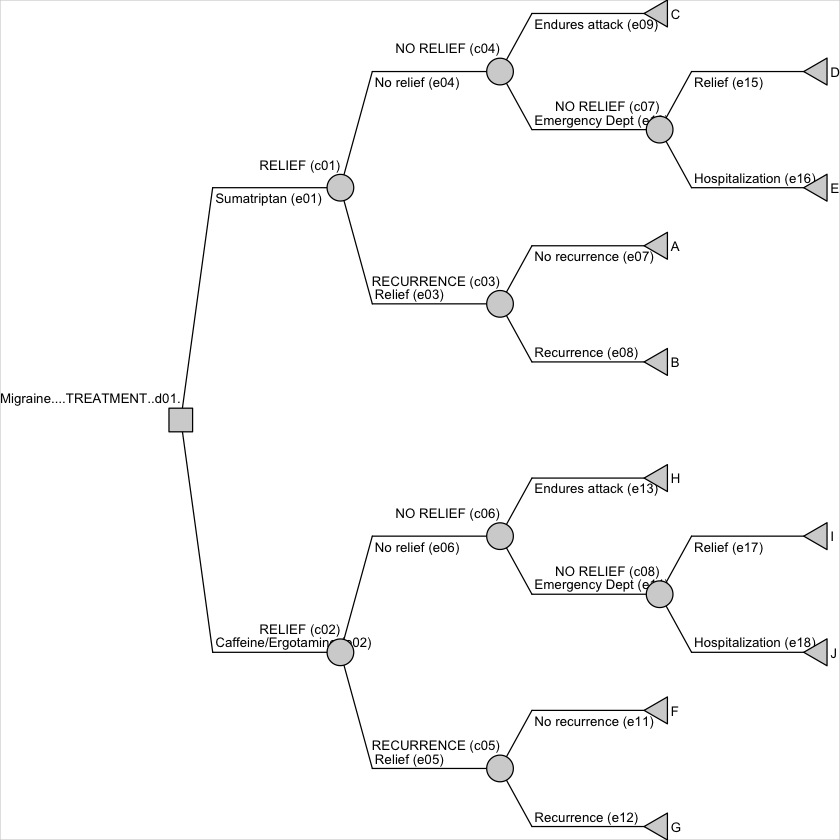

In [29]:
# tree
dt = DecisionTree$new(V, E)
dt$draw(border = TRUE)

In [30]:
es = dt$evaluate()
es

Run,Migraine....TREATMENT..d01.,Probability,Cost,Benefit,Utility,QALY
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Caffeine/Ergotamine (e02),1,4.714972,0,0.2012760,0.0005510635
1,Sumatriptan (e01),1,22.058057,0,0.4168609,0.0011413030


In [31]:
ep <- dt$evaluate(by = "path")
ep

Run,Migraine....TREATMENT..d01.,Leaf,Probability,Cost,Benefit,Utility,QALY
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Caffeine/Ergotamine (e02),F,0.26643700,0.35169684,0,0.266437000,7.294648e-04
1,Caffeine/Ergotamine (e02),G,0.11256300,0.29716632,0,0.101306700,2.773626e-04
1,Caffeine/Ergotamine (e02),H,0.57132000,0.75414240,0,-0.171396000,-4.692567e-04
1,Caffeine/Ergotamine (e02),I,0.04958064,3.19695967,0,0.004958064,1.357444e-05
1,Caffeine/Ergotamine (e02),J,0.00009936,0.11500721,0,-0.000029808,-8.160986e-08
1,Sumatriptan (e01),A,0.33145200,5.33637720,0,0.331452000,9.074661e-04
1,Sumatriptan (e01),B,0.22654800,7.29484560,0,0.203893200,5.582292e-04
1,Sumatriptan (e01),C,0.40664000,6.54690400,0,-0.121992000,-3.339959e-04
1,Sumatriptan (e01),D,0.03528928,2.79702833,0,0.003528928,9.661678e-06
